In [48]:
with open("run.out") as f:
    content = f.readlines()

sizes = []
types = []
runs = {}

for run in content:
    if len(run) == 1 or run.startswith("#"):
        continue

    type_data, time = run.split(", ")
    algorithm, size = type_data.split(": ")

    time = float(time[6:-2])
    size = int(size.split("x")[0])

    if size  not in sizes:
        sizes.append(size)

    if algorithm not in types:
        types.append(algorithm)

    if algorithm not in runs:
        runs[algorithm] = []
    runs.get(algorithm).append(time)

print(runs, sizes, types)

{'naive': [0.3524, 2.8191, 9.9958, 21.7125, 57.387, 106.7012, 207.492, 230.175, 445.84], 'seq': [0.325, 2.552, 8.8686, 20.6917, 39.9139, 70.5438, 111.6588, 167.2738, 237.506], 'omp-4': [0.1042, 0.6891, 2.2743, 5.3166, 10.5051, 18.3943, 29.6172, 43.9955, 63.3926], 'omp-9': [0.0769, 0.5057, 1.5645, 3.6734, 7.3391, 13.5106, 21.9711, 32.6951, 46.8271], 'omp-16': [0.0417, 0.2047, 0.6954, 1.554, 2.9981, 5.0649, 8.1998, 11.8976, 17.4656], 'omp-25': [0.035, 0.1537, 0.4904, 1.1318, 2.1481, 3.7113, 5.9404, 8.5143, 12.5136], 'omp-36': [0.0323, 0.1245, 0.3539, 0.7761, 1.5294, 2.6717, 4.3463, 6.2756, 9.3794, 1.1837, 9.1384, 41.6498, 72.3246, 117.2882, 329.4638, 451.7212], 'omp-38': [0.0348, 0.1176, 0.36, 0.773, 1.5316, 2.6914, 4.3926, 6.3686, 9.4285], 'mpi-4': [0.0867, 0.6937, 2.3613, 5.5322, 10.7567, 18.8341, 29.7814, 44.1214, 62.8241, 0.0897, 0.704, 2.382, 5.5769, 10.8345, 18.9489, 0.0, 0.0, 0.0, 0.0899, 0.7061, 2.383, 5.5845, 10.8483, 18.9496, 29.9883, 44.3107, 63.2653], 'mpi-9': [0.0404, 0.3102

IndexError: list index out of range

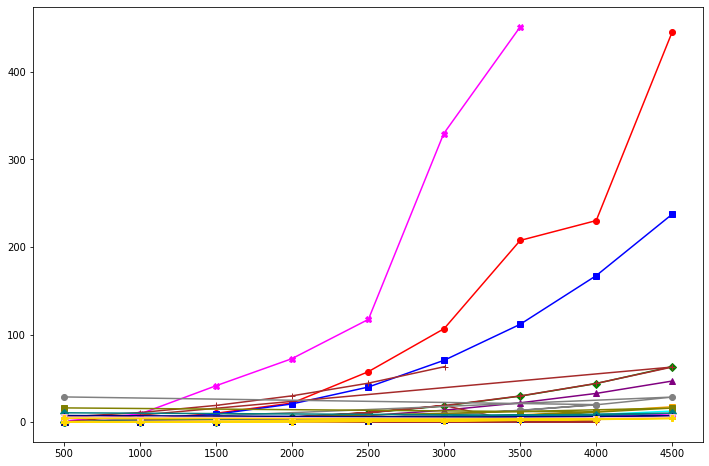

In [49]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = sizes

# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray', 'olive', 'teal', 'navy', 'pink', 'gold']
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+']
markers *= 2


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    if t == "omp-38":
        continue
    ax.plot(x[:len(runs[t])], runs[t], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = sizes

lookup = ["omp-16", "mpi-16", "mpi-25", "mpi-36", "mpi-49", "mpi-64"]
# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray', 'olive', 'teal', 'navy', 'pink', 'gold']
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+']
markers *= 2

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    # if t not in lookup:
    #     continue
    if not t.startswith("mpi") and not t.startswith("omp") or "-4" in t or "-9" in t or t == "omp-38":
        continue
    ax.plot(x[:len(runs[t])], runs[t], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Matrix Size')')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()


In [ ]:
import math

numbers = [504, 999, 1503, 1998, 2502, 2997, 3501, 3996, 4500]
gcd = numbers[0]

for i in range(1, len(numbers)):
    gcd = math.gcd(gcd, numbers[i])

print("The common divisor of the numbers is:", gcd)


In [43]:
block_size = {
    "1": [],
    "2": [],
    "4": [],
    "8": [],
    "16": [],
    "32": [],
    "64": [],
    "128": []
}

In [44]:
input_data = """
1: 0.0104945
2: 0.0093684
4: 0.00906472
8: 0.00909932
16: 0.00952969
32: 0.0104835
64: 0.0106614
128: 0.0203033

1: 0.0843053
2: 0.0727157
4: 0.0716224
8: 0.0706326
16: 0.0723477
32: 0.075596
64: 0.0822057
128: 0.083749

1: 0.265107
2: 0.25295
4: 0.246485
8: 0.239233
16: 0.237546
32: 0.238264
64: 0.249639
128: 0.248967

1: 0.653957
2: 0.602363
4: 0.575931
8: 0.564085
16: 0.560378
32: 0.573834
64: 0.606257
128: 0.673454

1: 1.75278
2: 1.43824
4: 1.2593
8: 1.1768
16: 1.13237
32: 1.13505
64: 1.16316
128: 1.36802

1: 3.46614
2: 2.69163
4: 2.25879
8: 2.05513
16: 1.96744
32: 1.97394
64: 2.03604
128: 2.16882

1: 5.83455
2: 4.43644
4: 3.76045
8: 3.37235
16: 3.18692
32: 3.19336
64: 3.3098
128: 3.8507

1: 8.08791
2: 6.89422
4: 6.28002
8: 5.9089
16: 5.77881
32: 5.94145
64: 6.20965
128: 7.38156

1: 16.0394
2: 12.2184
4: 10.4503
8: 9.04071
16: 8.50311
32: 8.62098
64: 9.41218
128: 9.54277
"""

In [45]:
# Split input_data in lines and append every value into block_size
for line in input_data.split("\n"):
    if len(line) == 0:
        continue
    size, time = line.split(": ")
    block_size[size].append(float(time))

In [ ]:
import matplotlib.pyplot as plt

start = 0
sizes = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray', 'olive', 'teal', 'navy', 'pink', 'gold']
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+']
markers *= 2

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(block_size.keys()):
    # if t == "1" or t == "2" or t == "128":
    #     continue
    ax.plot(sizes[start:len(block_size[t])], block_size[t][start:], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks(sizes)

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()
